In [12]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
import numpy as np
import pandas as pd

import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio
pio.templates.default = "plotly_dark"
from plotly.subplots import make_subplots
import folium 
from folium import plugins
from tqdm.notebook import tqdm as tqdm
import matplotlib.pyplot as plt
from IPython.display import Image
%matplotlib inline


from pathlib import Path
data_dir = Path('/content/drive/MyDrive/covid_2')

import os
os.listdir(data_dir)

import warnings
warnings.filterwarnings('ignore')

In [14]:
cleaned_data = pd.read_csv(data_dir/'cleaned_data.csv',parse_dates=['Date'])
cleaned_data.head()


,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [15]:
grouped_us = cleaned_data[cleaned_data['Country/Region'] == "US"].reset_index()
grouped_us_date = grouped_us.groupby('Date')['Date', 'Confirmed', 'Deaths','Recovered','Active'].sum().reset_index()

grouped_UK = cleaned_data[cleaned_data['Country/Region'] == "United Kingdom"].reset_index()
grouped_UK_date = grouped_UK.groupby('Date')['Date', 'Confirmed', 'Deaths','Recovered','Active'].sum().reset_index()

grouped_Brazil = cleaned_data[cleaned_data['Country/Region'] == "Brazil"].reset_index()
grouped_Brazil_date = grouped_Brazil.groupby('Date')['Date', 'Confirmed', 'Deaths','Recovered','Active'].sum().reset_index()

grouped_Russia = cleaned_data[cleaned_data['Country/Region'] == "Russia"].reset_index()
grouped_Russia_date = grouped_Russia.groupby('Date')['Date', 'Confirmed', 'Deaths','Recovered','Active'].sum().reset_index()

grouped_India = cleaned_data[cleaned_data['Country/Region'] == "India"].reset_index()
grouped_India_date = grouped_India.groupby('Date')['Date', 'Confirmed', 'Deaths','Recovered','Active'].sum().reset_index()

grouped_rest = cleaned_data[~cleaned_data['Country/Region'].isin(['US', 'United Kingdom', 'Brazil', 'Russia', 'India'])].reset_index()
grouped_rest_date = grouped_rest.groupby('Date')['Date', 'Confirmed', 'Deaths','Recovered','Active'].sum().reset_index()

## Comparisions

**How about comparing the cases to better assess the situation**

In [16]:
temp = cleaned_data.groupby('Date')['Recovered', 'Deaths', 'Active'].sum().reset_index()
temp = temp.melt(id_vars="Date", value_vars=['Recovered', 'Deaths', 'Active'],
                 var_name='case', value_name='count')


fig = px.area(temp, x="Date", y="count", color='case',
             title='Cases over time: Area Plot', color_discrete_sequence = ['cyan', 'red', 'orange'])
fig.show()

In [17]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from IPython.display import Image

In [18]:
pip install -U kaleido

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


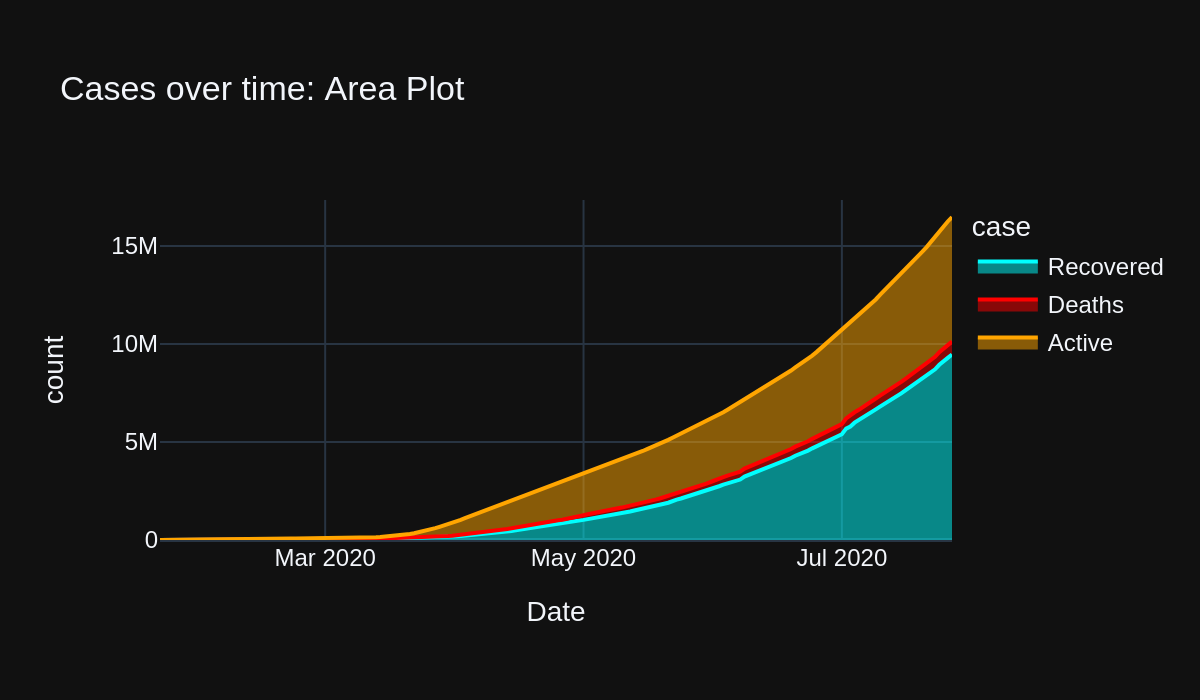

In [19]:
Image(fig.to_image(format="png", width=600, height=350, scale=2, engine="kaleido"))

* Active cases rising up completely all together leaving recoveries way behind and deaths also staring to increase and might see a big rise if the trend continues.


Taking US out of the equation to see the effects elsewhere.

In [20]:
rest = cleaned_data[cleaned_data['Country/Region'] != 'US']
rest_grouped = rest.groupby('Date')['Recovered', 'Deaths', 'Active'].sum().reset_index()

temp = rest_grouped.melt(id_vars="Date", value_vars=['Recovered', 'Deaths', 'Active'],
                 var_name='case', value_name='count')


fig = px.area(temp, x="Date", y="count", color='case',
             title='Cases - Rest of the World: Area Plot', color_discrete_sequence = ['cyan', 'red', 'orange'])
fig.show()

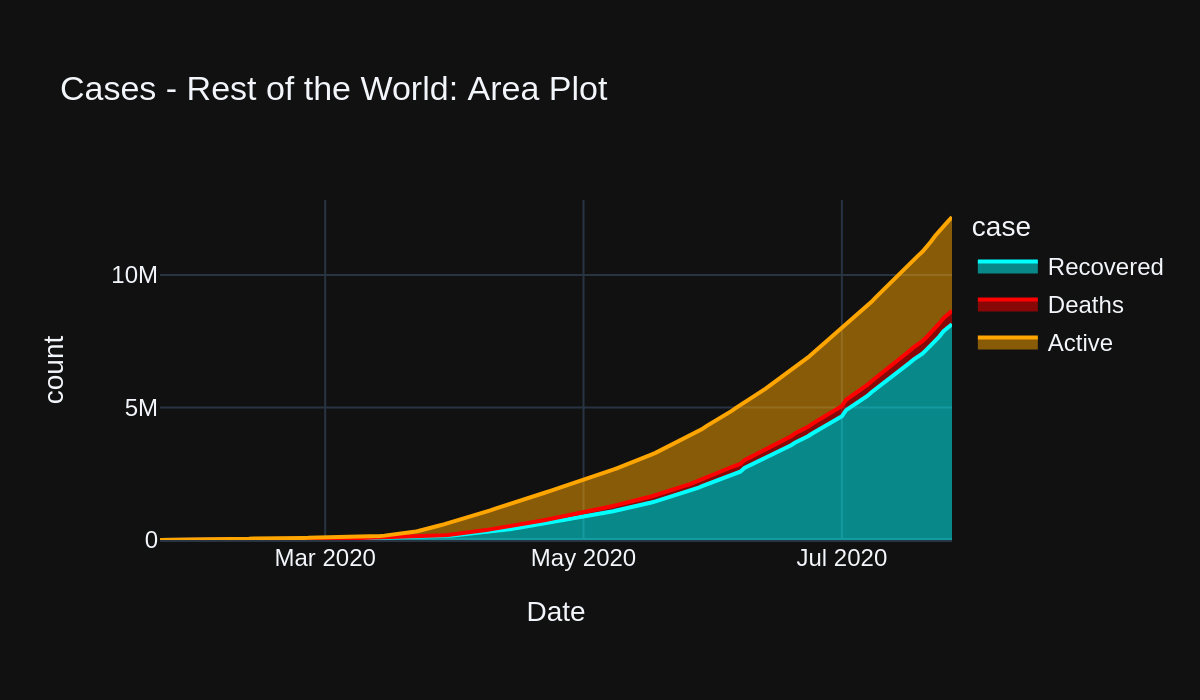

In [21]:
Image(fig.to_image(format="png", width=600, height=350, scale=2, engine="kaleido"))

## Mortality and Recovery Rates¶

**It is worth seeing these stats as well. It might have a story for sure.**

In [22]:
cleaned_latest = cleaned_data[cleaned_data['Date'] == max(cleaned_data['Date'])]
flg = cleaned_latest.groupby('Country/Region')['Confirmed', 'Deaths', 'Recovered', 'Active'].sum().reset_index()

flg['mortalityRate'] = round((flg['Deaths']/flg['Confirmed'])*100, 2)
temp = flg[flg['Confirmed']>100]
temp = temp.sort_values('mortalityRate', ascending=False)

fig = px.bar(temp.sort_values(by="mortalityRate", ascending=False)[:10][::-1],
             x = 'mortalityRate', y = 'Country/Region', 
             title='Deaths per 100 Confirmed Cases', text='mortalityRate', height=800, orientation='h',
             color_discrete_sequence=['darkred']
            )
fig.show()

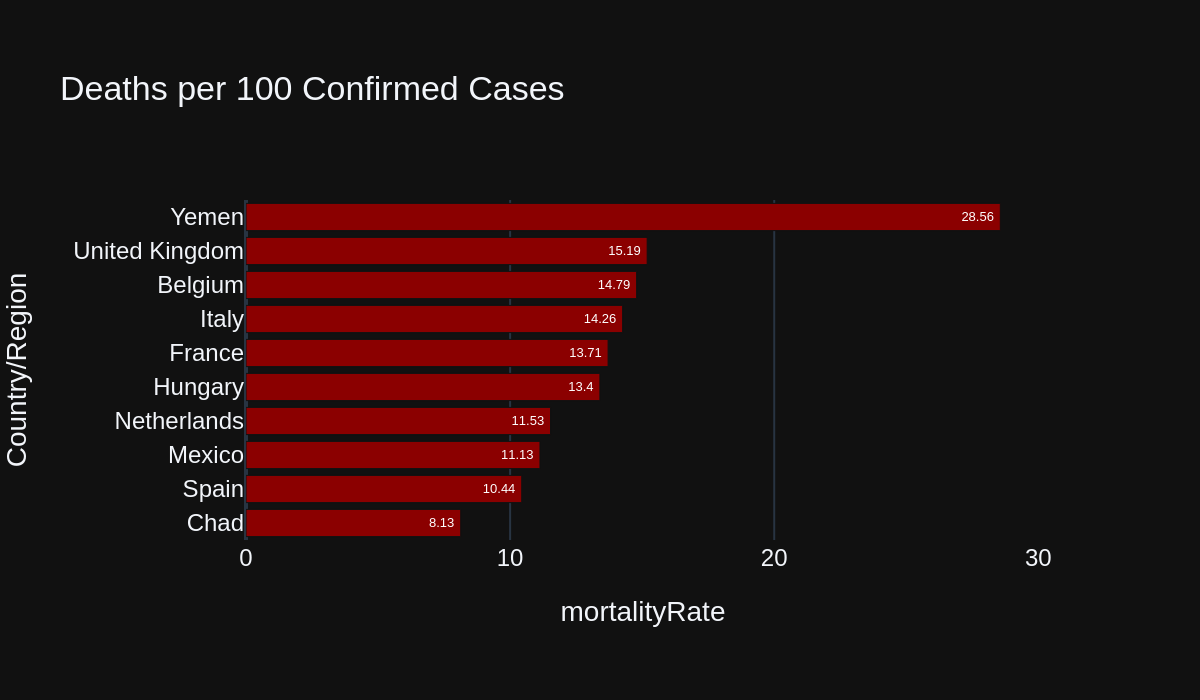

In [23]:
Image(fig.to_image(format="png", width=600, height=350, scale=2, engine="kaleido"))